# Bayesian Regression Revisited

This notebook aims at showing regression in a Bayesian context from a slightly different perspective to make the conceptual distinction with Frequentist regression (see also [Bayes_philosophy.ipynb](Bayes_philosophy.ipynb)) a bit clearer. 

## Another view on regression 

Let's look back at the example of the straight line.    
Our model is a straight line $y = \theta_1 \, x + \theta_0$. In a situation where we have no data, and a flat prior on $(\theta_0, \theta_1)$, all values of $(\theta_0, \theta_1)$ are possible. If for some reasons we know that we expect $\theta_0 \in [-1, 1]$ and $\theta_1 \in [0, 2]$, then we have restricted our plane simply because of our prior. 

Then we do our experiment and get the first data point $(x_1, y_1) = (-1, -1.004)$ with an uncertainty $\sigma_y = 0.01)$. There is an infinity of lines that go through that point BUT NOT all pairs of $(\theta_0,\theta_1)$ are possible, only those along the line of equation $\theta_1 = \theta_0 + 1.004 $

More formally, we can calculate a likelihood and a credible interval around that region of the parameter space.

Remember that for a point $y_i$ we have 

$$
p(y_i\,\mid\,\boldsymbol{\theta} ) = \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{y_i - (\theta_1 \, x_i + \theta_0) }{\sigma} \right)^2\right] 
$$

So, we can write our log likelihood for our point $(x_1, y_1)$: 

$$
\ln(P(D\mid\boldsymbol{\theta})) \, = -\frac{1}{2}\,\left (\ln(2\pi\sigma^2) + \frac{ (y_1 - (\theta_0+\theta_1\,x_1))^2}{\sigma^2} \right) 
$$


In [21]:
import numpy as np
from matplotlib import pyplot as plt
# Let's evaluate the likelihood via a gridding in the range defined by our prior
theta1_range = np.linspace(0, 2, 100)
theta0_range = np.linspace(-1, 1, 100)
x1, y1 = -1, -1.004
dy = 0.01

# Let's evaluate the likelihood for all pairs of parameters (theta0, thetha1)
# We can use a for loop and meshgrid but we can also proceed as follows
THETA1 = theta1_range[:, None]  # shape (100, 1)
THETA2 = theta0_range[None, :]  # shape (1, 100)

logL_x1 = -(((THETA1 * x1 + 
          THETA2) - y1) / dy) ** 2

Text(0.5, 1.0, 'DATA')

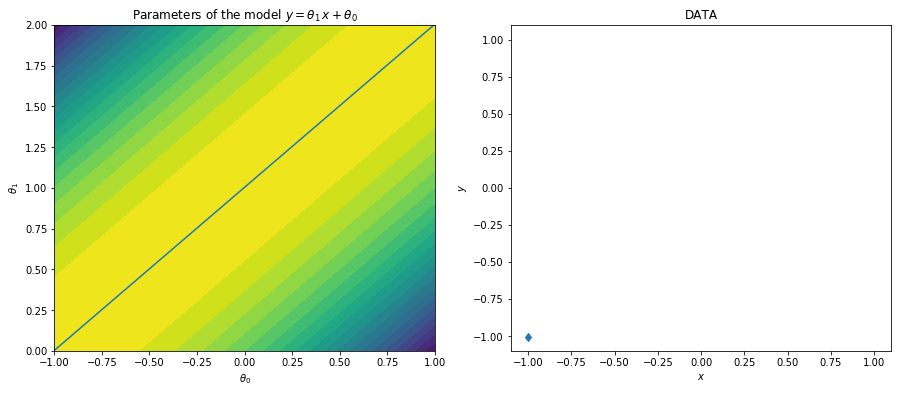

In [38]:
f, ax = plt.subplots(figsize=(15,6), ncols=2)
ax[0].contourf(theta0_range, theta1_range, logL_x1, levels=20)
maxL_x1 = theta0_range + 1.004
ax[0].plot(theta0_range, maxL_x1)
ax[0].set_xlabel(r'$\theta_0$')
ax[0].set_ylabel(r'$\theta_1$')
ax[0].set_ylim(0,2)
ax[0].set_xlim(-1,1)
ax[0].set_title(r'Parameters of the model $y = \theta_1 \, x + \theta_0 $')
#-----
# Data point 
ax[1].errorbar(x1, y1, yerr=dy, marker='d')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_ylim(-1.1,1.1)
ax[1].set_xlim(-1.1,1.1)
ax[1].set_title('DATA')

We can convert the plot in the left panel to a probability contour (but this is not critical for our illustration). Note here that our "frequentist regression would have been a bit in trouble in the sense that we would have -1 degree of freedom. So we wouldn't be able to provide any "best fit" for our parameters. But information is provided by this single data point (in the framework of our model !).  

We could have obtained another constraint on $(\theta_0,\theta_1)$ if we had measured another data point $(x_2, y_2) = (0.5, 0.4998)$. In that case only $(\theta_0,\theta_1)$ following the line of equation $y_2 = \theta_1 x_2 + \theta_0$, so replacing $(x_2, y_2)$ the parameters follow the line of equation $\theta_1 = (0.5 - \theta_0) / 0.4998$ 

In [35]:
x2, y2 = 0.5, 0.4998
dy = 0.01

logL_x2 = -(((THETA1 * x2 + 
          THETA2) - y2) / dy) ** 2

Text(0.5, 1.0, 'DATA')

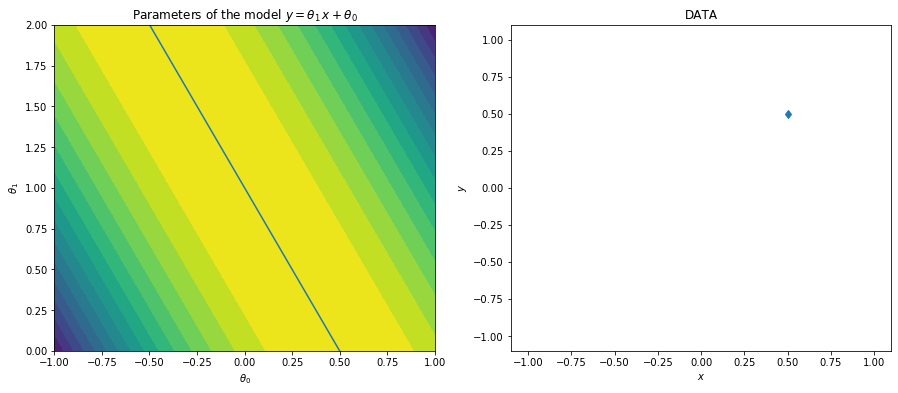

In [39]:
f, ax = plt.subplots(figsize=(15,6), ncols=2)
ax[0].contourf(theta0_range, theta1_range, logL_x2, levels=20)
maxL_x2 = (0.5 - theta0_range) / 0.4998
ax[0].plot(theta0_range, maxL_x2)
ax[0].set_xlabel(r'$\theta_0$')
ax[0].set_ylabel(r'$\theta_1$')
ax[0].set_ylim(0,2)
ax[0].set_xlim(-1,1)
ax[0].set_title(r'Parameters of the model $y = \theta_1 \, x + \theta_0 $')
#-----
# Data point 
ax[1].errorbar(x2, y2, yerr=dy, marker='d')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_ylim(-1.1,1.1)
ax[1].set_xlim(-1.1,1.1)
ax[1].set_title('DATA')

If we had now measured the 2 data points, we would have $\ln(P(D\mid\boldsymbol{\theta})) = \ln(P(x_1,y_1) \mid\boldsymbol{\theta})) + \ln(P(x_2,y_2) \mid\boldsymbol{\theta}))$. 

Text(0.5, 1.0, 'DATA')

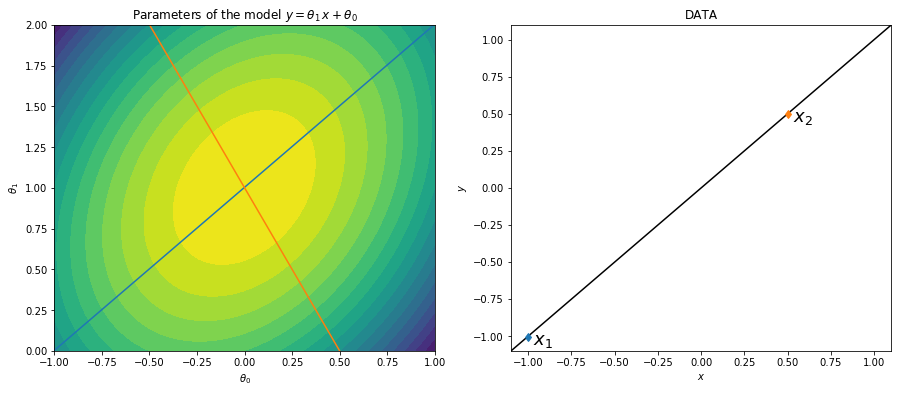

In [44]:
f, ax = plt.subplots(figsize=(15,6), ncols=2)
ax[0].contourf(theta0_range, theta1_range, logL_x1+logL_x2, levels=20)
ax[0].plot(theta0_range, maxL_x1, label = 'Constraint from (x1, y1)')
ax[0].plot(theta0_range, maxL_x2, label = 'Constraint from (x2, y2)')
ax[0].set_xlabel(r'$\theta_0$')
ax[0].set_ylabel(r'$\theta_1$')
ax[0].set_ylim(0,2)
ax[0].set_xlim(-1,1)
ax[0].set_title(r'Parameters of the model $y = \theta_1 \, x + \theta_0 $')
#-----
# Data point 
ax[1].errorbar(x1, y1, yerr=dy, marker='d')
ax[1].text(x1+0.03, y1-0.05, '$x_1$', size=18)
ax[1].text(x2+0.03, y2-0.05, '$x_2$', size=18)
ax[1].plot(np.linspace(-1.1,1.1,10), np.linspace(-1.1,1.1,10), color='black')
ax[1].errorbar(x2, y2, yerr=dy, marker='d')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_ylim(-1.1,1.1)
ax[1].set_xlim(-1.1,1.1)
ax[1].set_title('DATA')

This can be generalised to $n$ data points. It nicely illustrates the "Bayesian" idea that each data point inform us about the parameters of our model, or stated differently, how the constraints on the parameters respond to observations. 

Note also in that framework that it is also easy to account for a lower/upper limit on a data point. Instead of limiting $(\theta_0, \theta_1)$ to a line, a *lower/upper limit* would delimit a fraction of the plane with allowed/forbidden values of $(\theta_0, \theta_1)$.  

## Credible Intervals 

One aspect that might be bugging you is the fact that we state that in the frequentist framework we are calculating only a best value of the parameters while in the Bayesian approach we get the full pdf. However, we also provide uncertainties and sometimes even distributions associated to those parameters. While those distribution *can* be the effectively the same (remember that the $\chi^2$ in Frequentist optimisation maximizes the likelihood, so for ranges of priors you may end up with a posterior that has the same shape as the likelihood), they do **not** really mean the same thing. 

Remember that the **confidence interval** obtained in the frequentist way is a statement about the probability that the true value is encompassed within that interval. It is based on $p(x | \boldsymbol{\theta})$, where ${x_i}$ are the data points and $\boldsymbol{\theta}$ the parameters of the model. In the Bayesian framework, we infer the posterior distribution on parameters $\boldsymbol{\theta}$ (i.e. $p(\boldsymbol{\theta} | x)$). The latter allows us to calculate a **credible interval** based on the probability encompassed within specific percentiles of the posterior distribution. A credible interval is really a probability statement about the value of a parameter (there is a given probability for this parameter to fall within a given range) given the *data in hands and prior information*. This latter point is important: the posterior is derived  **only based on the data in hands** *and* some prior information $p(\theta)$ on the parameters/problem. Compared to the confidence interval, we have not made any assumption regarding repetition of a new data set to make this probabilistic statement. In addition, we account for the prior, something that the confidence interval does not do. 

### Reference 

- The example shown in [Another-view-on-regression](#Another-view-on-regression) is a free adaptation of the example provided in Fig. 8.1 of our reference book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 
- More discussions (and debates) about the difference between confidence and credible intervals can be found in this [stackechange thread](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval)  